Run 20200201_Get_MSDCV_scalar.ipynb. Then, use this program to plot the mean, standard deviation, and coefficient of variation across all runs.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

model_name = "New_CAA_const_fN_scalar"
test_conditions = "variable_position_only"
data_directory = "data/" + model_name + "/" + test_conditions + "/"

import os
if not os.path.exists(data_directory):
    os.makedirs(data_directory)

from pathlib import Path
results_dir = 'Results/20200202_msdcv_3000000_scalar_large_N/'
Path(results_dir).mkdir(parents=True, exist_ok=True)

msdcv = np.load(data_directory + "unrounded_msdcv.npy")
# model_figure_title = "$f(n) \propto 1/n^2$, Decr Avg Area"
# model_figure_title = "$f(n) \propto 1/n^2$, Const Avg Area"
# model_figure_title = "$f(n)$ Constant, Decr Avg Area"
model_figure_title = "$f(n)$ Constant, Const Avg Area"

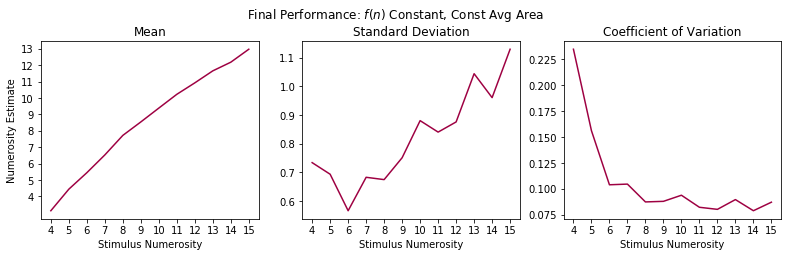

In [13]:
all_iters = [0, 200, 400, 1600, 6400, 6400, 102400, 204800, 409600, 819200, 1000000, 1228800, 1638400, 2000000, 3000000]#, 4000000, 5000000, 6000000]
iters = [3000000]
iter_indices = [i for i, iteration in enumerate(all_iters) if iteration in iters]
max_blobs = 15
min_blobs = 4
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(3.7*3, 3.6))
from matplotlib.ticker import MaxNLocator
plt.xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
numerosity = np.arange(min_blobs, max_blobs+1)

ax[0].set_title("Mean")
ax[0].set_xlabel("Stimulus Numerosity")
ax[0].set_ylabel("Numerosity Estimate")
ax[0].set_yticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[0].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[0].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

ax[1].set_title("Standard Deviation")
ax[1].set_xlabel("Stimulus Numerosity")
ax[1].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[1].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

ax[2].set_title("Coefficient of Variation")
ax[2].set_xlabel("Stimulus Numerosity")
# ax[2].set_yticks(np.arange(0, 1, step=0.02))
ax[2].set_xticks(np.arange(min_blobs, max_blobs+1, step=1))
ax[2].set_prop_cycle('color',plt.cm.Spectral([val for val in np.linspace(0,1,len(iter_indices)) for _ in (0,1)]))

for i in iter_indices:
    mean = msdcv[i,min_blobs-1:max_blobs,0]
    sd = msdcv[i,min_blobs-1:max_blobs+1,1]
    cv = msdcv[i,min_blobs-1:max_blobs+1,2]

    # Plot Mean.
    ax[0].plot(numerosity, mean, label='N')
    
    # Plot CV.
    ax[1].plot(numerosity, sd, label='N')
    
    # Plot CV.
    ax[2].plot(numerosity, cv, label='N')

# legend = ax[i, 1].legend()
fig.tight_layout()    
fig.suptitle("Final Performance: %s" % model_figure_title)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(results_dir + model_name + '.png')
plt.show()